In [160]:
import pandas as pd

In [163]:
df = pd.read_csv("./../data/data_wuhan/channel_7.csv",
                 usecols=["Date_Time", "Test_Time(s)", "Step_Index", "Cycle_Index", "Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)"])

In [166]:
df[(df.Cycle_Index == 1) & ( (df.Step_Index == 1) | (df.Step_Index == 3))]

,Date_Time,Test_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah)
0,2018-09-14 16:39:49.863,60.010500,1,1,3.530674,1.299788,0.021548,1.761754e-09
1,2018-09-14 16:40:49.864,120.011800,1,1,3.558775,1.299831,0.043207,1.761754e-09
2,2018-09-14 16:41:49.853,180.000900,1,1,3.570162,1.299841,0.064868,1.761754e-09
3,2018-09-14 16:42:49.861,240.008900,1,1,3.576921,1.299820,0.086534,1.761754e-09
4,2018-09-14 16:43:49.860,300.007800,1,1,3.583076,1.299814,0.108199,1.761754e-09
...,...,...,...,...,...,...,...,...
234,2018-09-14 20:33:09.818,14059.965792,3,1,3.058974,-1.299524,2.216611,2.209313e+00
235,2018-09-14 20:34:09.820,14119.967692,3,1,2.996843,-1.299570,2.216611,2.230957e+00
236,2018-09-14 20:35:09.817,14179.964792,3,1,2.920110,-1.299566,2.216611,2.252634e+00
237,2018-09-14 20:36:09.816,14239.963192,3,1,2.821015,-1.299526,2.216611,2.274287e+00


In [169]:
df['Date_Time'].min()

'2018-09-14 16:39:49.863'

In [171]:
df['Date_Time'].max()

'2019-01-16 12:55:18.925'

In [177]:
len(df)

1395249

In [ ]:
df[(df.Cycle_Index == 1)]['Date_Time']

In [188]:
voltage = df[(df.Cycle_Index == 1) & (df.Step_Index == 1)]['Voltage(V)'].values

In [197]:
x = range(0, len(voltage))

In [198]:
df2 = pd.read_csv("./../data/data_wuhan/channel_8.csv",
                 usecols=["Date_Time", "Test_Time(s)", "Step_Index", "Cycle_Index", "Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)"])

In [199]:
voltage2 = df2[(df2.Cycle_Index == 1) & (df2.Step_Index == 1)]['Voltage(V)'].values

In [200]:
x2 = range(0, len(voltage2))

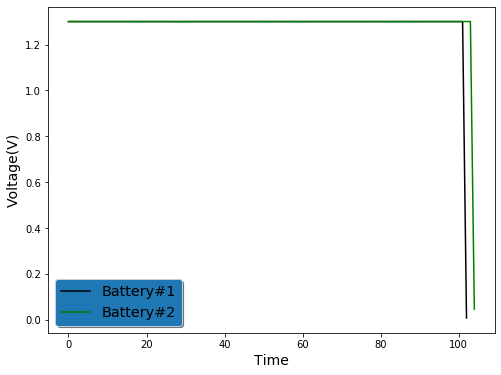

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
# Create plots with pre-defined labels.
# plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(8,6))

x = range(0, len(df[(df.Cycle_Index == 1) & (df.Step_Index == 1)]['Current(A)'].values))
x2 = range(0, len(df2[(df2.Cycle_Index == 1) & (df2.Step_Index == 1)]['Current(A)'].values))


plt.plot(x,   df[(df.Cycle_Index == 1) & (df.Step_Index == 1)]['Current(A)'].values, linestyle="-", color='black', label='Battery#1')
plt.plot(x2, df2[(df2.Cycle_Index == 1) & (df2.Step_Index == 1)]['Current(A)'].values, linestyle="-", color='green', label='Battery#2')

plt.xlabel('Time', fontsize=14)

plt.ylabel('Voltage(V)', fontsize=14)

# Put a nicer background color on the legend.
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
# Create plots with pre-defined labels.
# plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(8,6))


plt.plot(x,   df[(df.Cycle_Index == 1) & (df.Step_Index == 1)]['Voltage(V)'].values, linestyle="-", color='black', label='Battery#1')
plt.plot(x2, df2[(df2.Cycle_Index == 1) & (df2.Step_Index == 1)]['Voltage(V)'].values, linestyle="-", color='green', label='Battery#2')

plt.xlabel('Time', fontsize=14)

plt.ylabel('Voltage(V)', fontsize=14)

# Put a nicer background color on the legend.
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()

In [4]:
discharge_cap_over_cycle_df = pd.read_csv("./discharge_over_cycles_channel_7.csv")

In [173]:
discharge_cap_over_cycle_df.head()

,Cycle,Discharge_Capacity(Ah)
0,1,2.286119
1,2,2.290558
2,3,2.307867
3,4,2.308050
4,5,2.318817


In [175]:
len(discharge_cap_over_cycle_df)

215

In [176]:
215 * 2

430

In [6]:
discharge_cap_over_cycle_dict = {}
for index, row in discharge_cap_over_cycle_df.iterrows():
    discharge_cap_over_cycle_dict[int(row['Cycle'])] = row['Discharge_Capacity(Ah)']

In [133]:
import numpy as np

cycle_indexs = [1, 2]

X = []
Y = []
for cycle_index in cycle_indexs:
    for _ in range(0, 3):
        data_df = df[(df.Cycle_Index == cycle_index) & ( (df.Step_Index == 1) | (df.Step_Index == 3))].sample(n = 5).sort_index()[['Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)']]
        x = data_df.to_numpy().flatten()
        y = discharge_cap_over_cycle_dict[cycle_index]
        X.append(x)
        Y.append(y)
        
X = np.array(X)
Y = np.array(Y)

In [134]:
X

array([[ 4.09875631,  1.2997303 ,  1.97116864,  3.81801271, -1.29965019,
         2.21661115,  3.62406588, -1.29954338,  2.21661115,  3.5529294 ,
        -1.29958534,  2.21661115,  3.54770422, -1.29963875,  2.21661115],
       [ 3.60287142,  1.29978752,  0.17318222,  3.79374552,  1.29971123,
         1.10467458,  3.4468379 , -1.29962158,  2.21661115,  3.28175497,
        -1.29958534,  2.21661115,  3.15036249, -1.29953766,  2.21661115],
       [ 3.7311101 ,  1.29973602,  0.71475619,  3.74392557,  1.29970741,
         0.80140448,  3.79797506,  1.299757  ,  1.12633979,  4.12550306,
         1.29977417,  2.03615499,  3.43381071, -1.2995224 ,  2.21661115],
       [ 3.76363802,  1.29973602,  1.10475278,  4.16854715,  1.29979897,
         2.27456284,  3.90448618, -1.29970932,  2.34729981,  3.77499437,
        -1.29965019,  2.34729981,  3.62704897, -1.29964828,  2.34729981],
       [ 3.68530416,  1.29984665,  0.62815779,  3.99609613,  1.29973602,
         1.88461888,  3.83072138, -1.29963303, 

In [135]:
X.shape

(6, 15)

In [136]:
Y

array([2.28611898, 2.28611898, 2.28611898, 2.29055786, 2.29055786,
       2.29055786])

In [138]:
Y.shape

(6,)

In [43]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras import layers, regularizers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, ReLU, Dense, SeparableConv2D, DepthwiseConv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from keras.optimizers import SGD, Adam
import glob
import multiprocessing as mp
from itertools import repeat
import sys

Using TensorFlow backend.


In [154]:
# regularizer = None
# model = keras.Sequential()
# model.add(layers.Dense(2, activation="relu", input_shape=(15,)))
# model.add(layers.Dense(40, activation="relu", input_shape=(15,)))

# model.summary()

# from keras.optimizers import SGD, Adam
# sgd = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=sgd, loss='mse')


In [150]:
X.shape

(6, 15)

In [152]:
np.transpose(X).shape[0]

15

In [159]:
# input_shape = (np.transpose(X).shape[0], )
# print(input_shape)
regularizer = None
model = Sequential([
                    Conv2D(input_shape=(1,15), 
                           filters=16, 
                           kernel_size=(1,2),
                           strides=(1,1), 
                           padding='same', 
                           kernel_regularizer=regularizer),
                    BatchNormalization(axis=1),
                    ReLU(),
                    MaxPooling2D(pool_size=(3,1), strides=(2,1)),
                    Conv2D(filters=32, kernel_size=(3,1), strides=(1,1), padding='same', kernel_regularizer=regularizer),
                    BatchNormalization(axis=1),
                    ReLU(),
                    Conv2D(filters=40, kernel_size=(3,1), strides=(1,1), padding='same', kernel_regularizer=regularizer),
                    BatchNormalization(axis=1),
                    ReLU(),
                    Conv2D(filters=40, kernel_size=(3,1), strides=(1,1), padding='same', kernel_regularizer=regularizer),
                    BatchNormalization(axis=1),
                    ReLU(),
                    Conv2D(filters=40, kernel_size=(3,1), strides=(1,1), padding='same', kernel_regularizer=regularizer),
                    BatchNormalization(axis=1),
                    ReLU(),
                    GlobalAveragePooling2D(),
                    Dense(40, kernel_regularizer=regularizer),
                    BatchNormalization(),
                    ReLU(),
                    Dense(40, kernel_regularizer=regularizer),
                    BatchNormalization(),
                    ReLU(),
  ])

sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss='mse')

(15,)


ValueError: Input 0 is incompatible with layer conv2d_35: expected ndim=4, found ndim=2